In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

wholesale = pd.read_csv('datasets/wholesale.csv').drop(columns=['index'],axis=1)
wholesale.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185


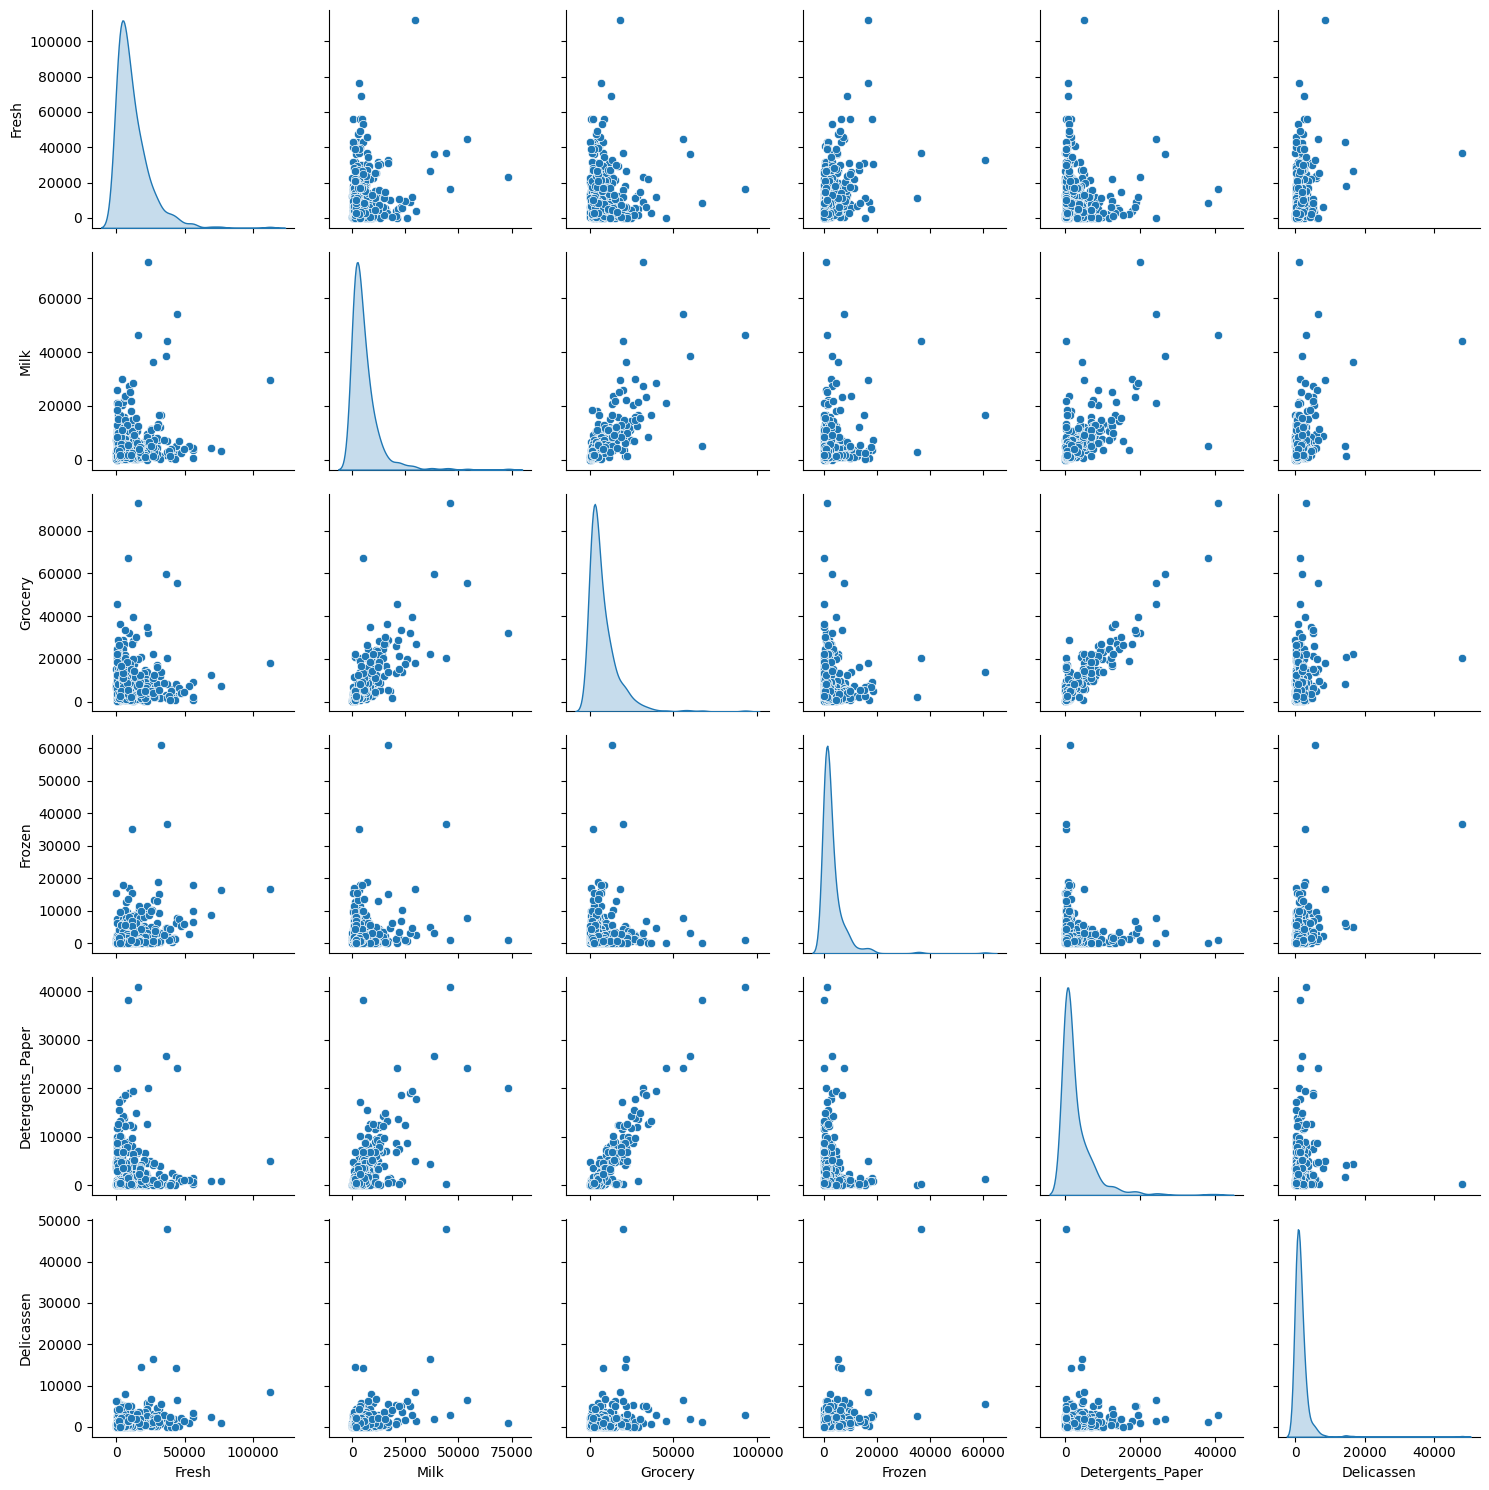

'\nGood! You can see that most variables have non-symmetrical distributions i.e. they are skewed.\n'

In [17]:
# exercise 01

"""
Explore customer product purchase dataset

You have explored the customer by product purchase dataset in the video exercise and are now ready to plot some exploratory charts to understand the distribution of the variables and relationships between them. Here, you will explore the wholesale dataset and plot the pairwise relationships as well as the estimated distributions for each variable with the pairplot function from the seaborn library. It's an important step to explore the distribution types, and the relationships between the variables to inform the need for further data preprocessing.

The pandas library is loaded as pd, seaborn as sns, and matplotlib.pyplot as plt. Also, the wholesale dataset has been loaded as a pandas DataFrame.
"""

# Instructions

"""

    Print the header of the wholesale dataset

    Plot the pairwise relationships between the variables

    Display the chart.

"""

# solution

# Print the header of the `wholesale` dataset
print(wholesale.head())

# Plot the pairwise relationships between the variables
sns.pairplot(data=wholesale, diag_kind='kde')

# Display the chart
plt.tight_layout()
plt.show()

#----------------------------------#

# Conclusion

"""
Good! You can see that most variables have non-symmetrical distributions i.e. they are skewed.
"""

In [23]:
averages = wholesale.mean()
std_devs = wholesale.std()

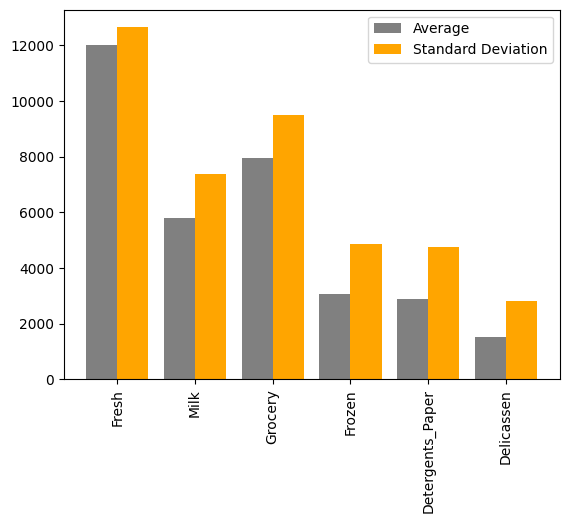

'\nGreat! This plot gives you a visual sense of the differences in averages and standard deviations.\n'

In [24]:
# exercise 02

"""
Understand differences in variables

Now, you will analyze the averages and standard deviations of each variable by plotting them in a barplot. This is a complementary step to the one before, as you will visually explore the differences in variable scales and variances.

The pandas library is loaded as pd and matplotlib.pyplot as plt. Also, the wholesale dataset has been loaded as a pandas DataFrame, while the averages and standard deviations for each column of the wholesale dataset are loaded as pandas Series named averages and std_devs respectively. Make sure you explore them in the console.
"""

# Instructions

"""

    Create a list with wholesale's column names and another one with sorted values from 0 to the number of columns in wholesale.

    Plot averages in grey and std_devs in orange, adjust the x-axis by 0.2

    Add x_ix as ticks and x_names as labels and make sure you rotate them by 90 degrees.

    Add the legend and display the chart.

"""

# solution

# Create column names list and same length integer list
x_names = wholesale.columns
x_ix = np.arange(wholesale.shape[1])

# Plot the averages data in gray and standard deviations in orange 
plt.bar(x=x_ix-0.2, height=averages, color='grey', label='Average', width=0.4)
plt.bar(x=x_ix+0.2, height=std_devs, color='orange', label='Standard Deviation', width=0.4)

# Add x-axis labels and rotate
plt.xticks(ticks=x_ix, labels=x_names, rotation=90)

# Add the legend and display the chart
plt.legend()
plt.show()

#----------------------------------#

# Conclusion

"""
Great! This plot gives you a visual sense of the differences in averages and standard deviations.
"""

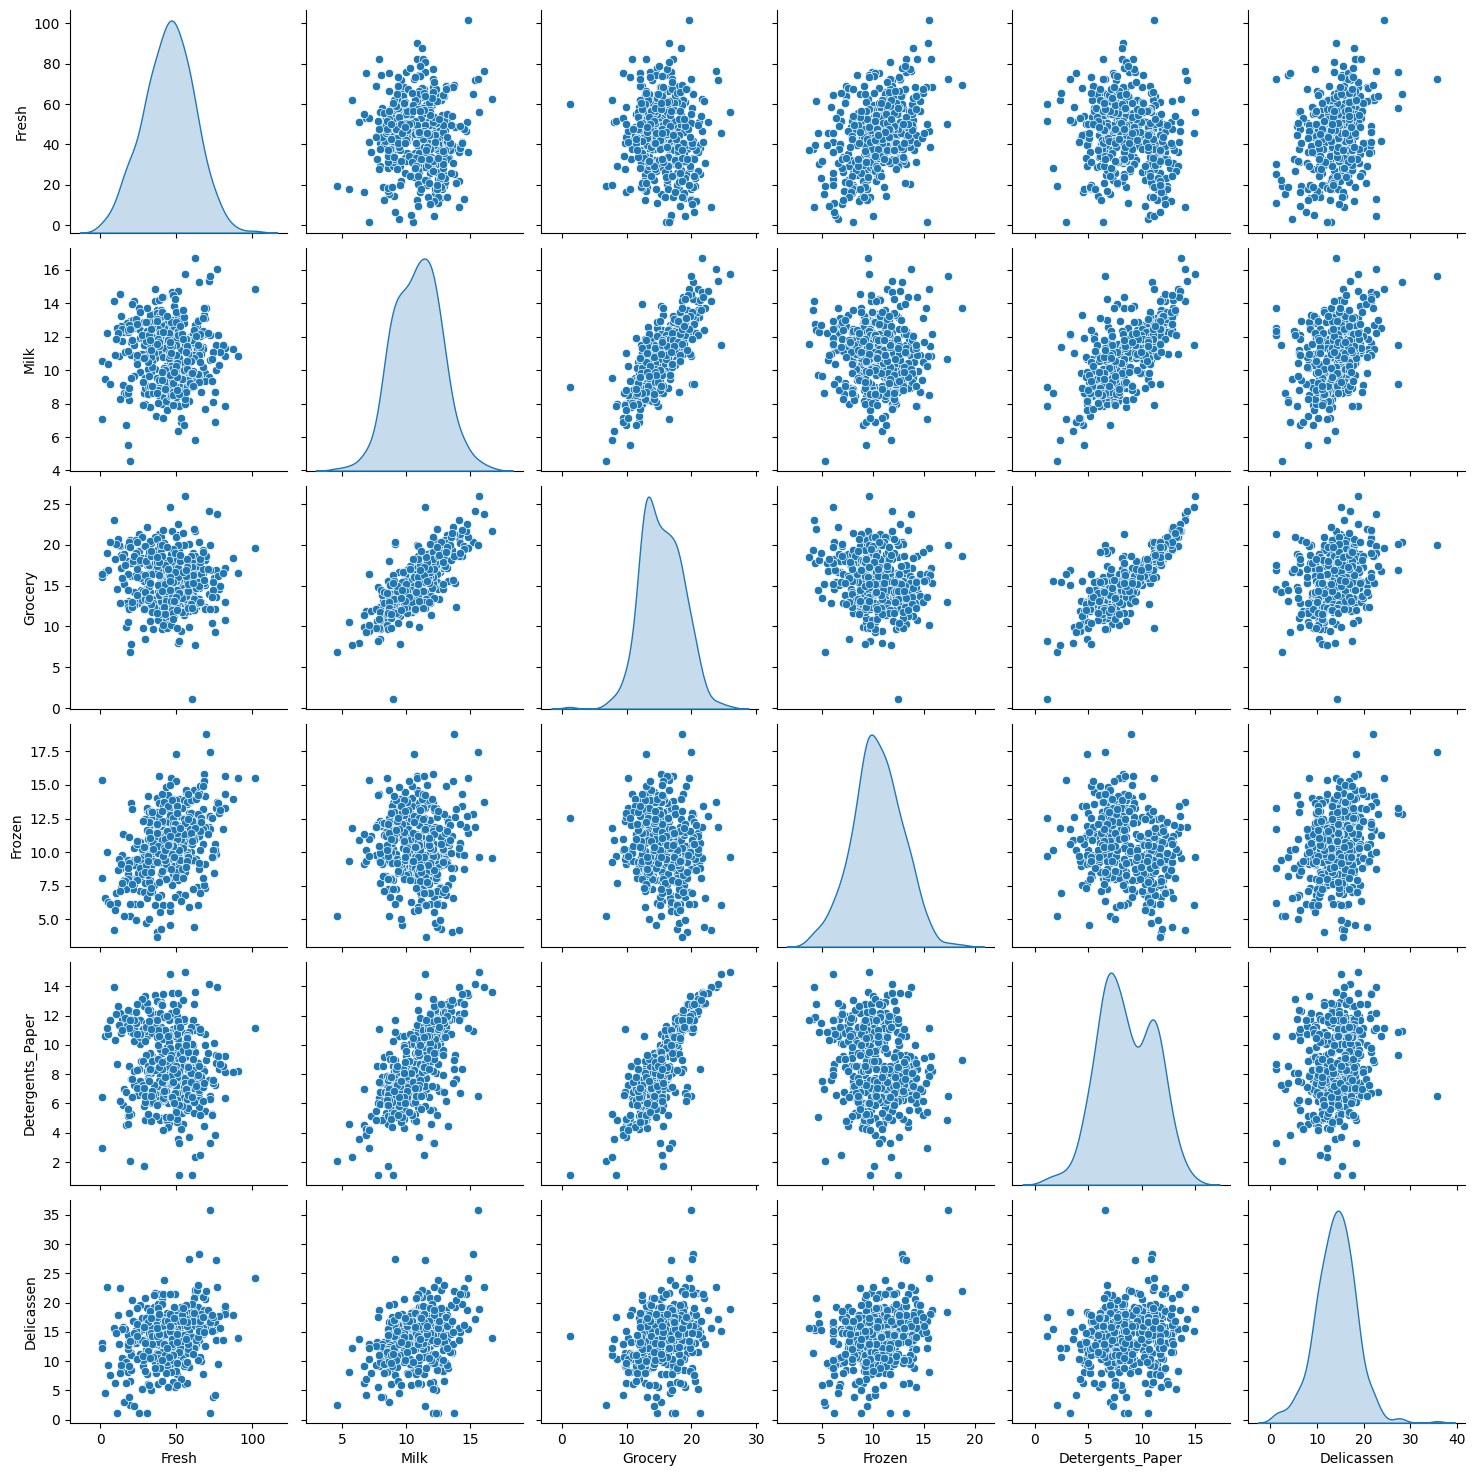

'\nFantastic! By using Box-Cox transformation you have successfully unskewed the variables and they now are almost normally distributed.\n'

In [25]:
# exercise 03

"""
Unskew the variables

You will now transform the wholesale columns using Box-Cox transformation, and then explore the pairwise relationships plot to make sure the skewness of the distributions has been reduced to make them more normal. This is a critical step to make sure the K-means algorithm converges and discovers homogeneous groups (a.k.a. clusters or segments) of observations.

The stats module is loaded from the scipy library, and the wholesale dataset has been imported as a pandas DataFrame.
"""

# Instructions

"""

    Define a custom Box Cox transformation function that could be applied to a pandas DataFrame.

    Apply the function to the wholesale dataset.

    Plot the pairwise relationships between the transformed variables.

    Display the chart.

"""
from scipy import stats
# solution

# Define custom Box Cox transformation function
def boxcox_df(x):
    x_boxcox, _ = stats.boxcox(x)
    return x_boxcox

# Apply the function to the `wholesale` dataset
wholesale_boxcox = wholesale.apply(boxcox_df, axis=0)

# Plot the pairwise relationships between the transformed variables 
sns.pairplot(wholesale_boxcox, diag_kind='kde')

# Display the chart
plt.show()

#----------------------------------#

# Conclusion

"""
Fantastic! By using Box-Cox transformation you have successfully unskewed the variables and they now are almost normally distributed.
"""

In [27]:
# exercise 04

"""
Normalize the variables

Now, for the last step in data preparation. You will transform the unskewed dataset wholesale_boxcox to the same scale, meaning all columns have a mean of zero, and standard deviation of 1. You will use the StandardScaler function from the sklearn.preprocessing module.

The unskewed wholesale_coxbox dataset you have transformed in the previous exercise has been imported as a pandas DataFrame. Also, the StandardScaler() instance has been initialized as scaler.
"""

# Instructions

"""

    Fit the initialized scaler instance on the Box-Cox transformed dataset.

    Transform and store the scaled dataset as wholesale_scaled.

    Create a pandas DataFrame from the scaled dataset.

    Print the mean and standard deviation for all columns.

"""

# solution
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the initialized `scaler` instance on the Box-Cox transformed dataset
scaler.fit(wholesale_boxcox)

# Transform and store the scaled dataset as `wholesale_scaled`
wholesale_scaled = scaler.transform(wholesale_boxcox)

# Create a `pandas` DataFrame from the scaled dataset
wholesale_scaled_df = pd.DataFrame(data=wholesale_scaled,
                                       index=wholesale_boxcox.index,
                                       columns=wholesale_boxcox.columns)

# Print the mean and standard deviation for all columns
print(wholesale_scaled_df.agg(['mean','std']).round())

#----------------------------------#

# Conclusion

"""
That looks correct! As you can see, the averages are roughly zero, and the standard deviations are around one, which is what we wanted!
"""

      Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
mean   -0.0  -0.0      0.0    -0.0              -0.0         0.0
std     1.0   1.0      1.0     1.0               1.0         1.0


'\nThat looks correct! As you can see, the averages are roughly zero, and the standard deviations are around one, which is what we wanted!\n'

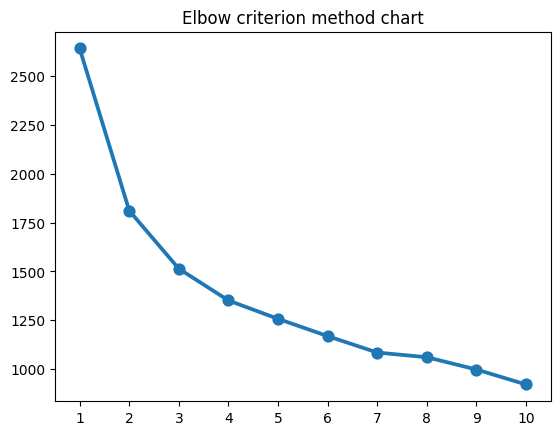

'\nGood job! You can see that the "elbow" is somewhere around 2 or 3 clusters, which means you should start cluster with +1 number of clusters i.e. with 3 or 4.\n'

In [28]:
# exercise 05

"""
Determine the optimal number of clusters

Here, you will use the elbow criterion method to identify the optimal number of clusters where the squared sum of error decrease becomes marginal. This is an important step to get a mathematical ball-park number of clusters to start testing. You will iterate through multiple k number of clusters and run a KMeans algorithm for each, then plot the errors against each k to identify the "elbow" where the decrease in errors slows downs.

The KMeans module is loaded from sklearn.cluster, the seaborn library is loaded as sns, and the matplotlib.pyplot module is loaded as plt. Also, the scaled dataset is loaded as wholesale_scaled_df as a pandas DataFrame.
"""

# Instructions

"""

    Create an empty sse dictionary.

    Fit a KMeans algorithm on k values between 1 and 11 and store the errors in the sse dictionary.

    Add the title to the plot.

    Create a scatter plot with keys on X-axis and values on the Y-axis and display the chart.

"""

# solution
from sklearn.cluster import KMeans

# Create empty sse dictionary
sse = {}

# Fit KMeans algorithm on k values between 1 and 11
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=333)
    kmeans.fit(wholesale_scaled_df)
    sse[k] = kmeans.inertia_

# Add the title to the plot
plt.title('Elbow criterion method chart')

# Create and display a scatter plot
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()


#----------------------------------#

# Conclusion

"""
Good job! You can see that the "elbow" is somewhere around 2 or 3 clusters, which means you should start cluster with +1 number of clusters i.e. with 3 or 4.
"""

In [29]:
# exercise 06

"""
Build segmentation with k-means clustering

In this exercise, you will build the customer segmentation with KMeans algorithm. As you've identified in the previous step, the mathematically optimal number of clusters is somewhere around 3 and 4. Here, you will build one with 4 segments.

The pre-processed dataset has been loaded as wholesale_scaled_df. You will use it to run the KMeans algorithm, and the raw un-processed dataset as wholesale - you will later use it to explore the average column values for the 4 segments you'll build.
"""

# Instructions

"""

    Import the KMeans algorithm from sklearn.cluster module.

    Initialize KMeans algorithm with 4 clusters and a random state set to 123.

    Fit the model on the pre-processed wholesale_scaled_df dataset.

    Assign the generated labels to a new column called segment in the raw wholesale dataset

"""

# solution

# Import `KMeans` module
from sklearn.cluster import KMeans

# Initialize `KMeans` with 4 clusters
kmeans=KMeans(n_clusters=4, random_state=123)

# Fit the model on the pre-processed dataset
kmeans.fit(wholesale_scaled_df)

# Assign the generated labels to a new column
wholesale_kmeans4 = wholesale.assign(segment = kmeans.labels_)

#----------------------------------#

# Conclusion

"""
Great job! You have created a 3-segment solution with K-means clustering and have assigned labels the the original dataset.
"""

'\nGreat job! You have created a 3-segment solution with K-means clustering and have assigned labels the the original dataset.\n'

In [30]:
# exercise 07

"""
Alternative segmentation with NMF

In this exercise, you will analyze product purchase data and identify meaningful segments using non-negative matrix factorization algorithm (NMF). It works well with sparse customer by product matrices that are typical in the e-commerce or retail space. Finally, you will extract the components that you will then explore in the upcoming exercise.

We have loaded pandas as pd and numpy as np. Also, the raw customer by product purchase dataset has been loaded as wholesale.
"""

# Instructions

"""

    Import the non-negative matrix factorization function from sklearn.decomposition.

    Initialize NMF instance with 4 components.

    Fit the model on the wholesale sales data.

    Extract and store the components as a pandas DataFrame.

"""

# solution

# Import the non-negative matrix factorization module
from sklearn.decomposition import NMF

# Initialize NMF instance with 4 components
nmf = NMF(4)

# Fit the model on the wholesale sales data
nmf.fit(wholesale)

# Extract the components 
components = pd.DataFrame(data=nmf.components_, columns=wholesale.columns)

#----------------------------------#

# Conclusion

"""
Great job! You have extracted the components from a 3-segment solution with non-negative matrix factorization.
"""

'\nGreat job! You have extracted the components from a 3-segment solution with non-negative matrix factorization.\n'

In [31]:
# Initialize `KMeans` with 3 clusters
kmeans=KMeans(n_clusters=3, random_state=123)

# Fit the model on the pre-processed dataset
kmeans.fit(wholesale_scaled_df)

# Assign the generated labels to a new column
wholesale_kmeans3 = wholesale.assign(segment = kmeans.labels_)

           Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicassen
segment                                                                
0        22593.0  9766.0  10975.0  5808.0            3447.0      3589.0
1        11606.0  2008.0   2533.0  3114.0             439.0       870.0
2         4786.0  9450.0  15156.0   957.0            6724.0      1128.0


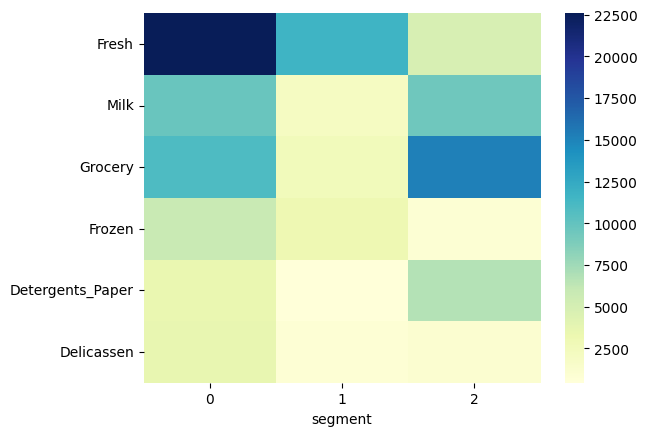

'\nLooks good! You can see how different are the 3 segments from each other - can you try to name each segment by their purchase patters?\n'

In [32]:
# exercise 08

"""
K-means segmentation averages

In this exercise, you will explore the average column values for a 3-segment solution with K-means. As part of the test & learn exploration process, visually inspecting the segmentation solutions is critical to identify the most business relevant option.

The seaborn as sns, and matplotlib.pyplot as plt. Also, we have run a 3-segment solution with K-means and loaded the dataset with assigned segment labels as wholesale_kmeans3 DataFrame.
"""

# Instructions

"""

    Group by the segment label and calculate average column values.

    Print the average column values per each segment.

    Create a heatmap on the average column values per each segment.

    Display the chart.

"""

# solution

# Group by the segment label and calculate average column values
kmeans3_averages = wholesale_kmeans3.groupby(['segment']).mean().round(0)

# Print the average column values per each segment
print(kmeans3_averages)

# Create a heatmap on the average column values per each segment
sns.heatmap(kmeans3_averages.T, cmap='YlGnBu')

# Display the chart
plt.show()

#----------------------------------#

# Conclusion

"""
Looks good! You can see how different are the 3 segments from each other - can you try to name each segment by their purchase patters?
"""

In [33]:
# Initialize NMF instance with 4 components
nmf = NMF(3)

# Fit the model on the wholesale sales data
nmf.fit(wholesale)

# Extract the components 
components = pd.DataFrame(data=nmf.components_, columns=wholesale.columns)

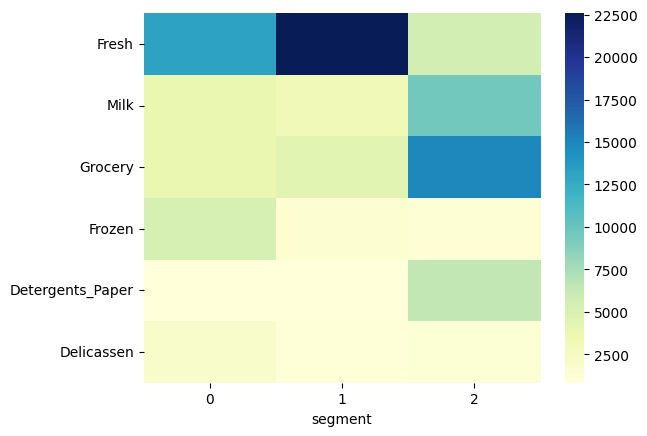

'\nLooks beautiful! You can see that this solution is different from the K-means 3-segment results - can you name the segments from this solution and spot the difference?\n'

In [34]:
# exercise 09

"""
NMF segmentation averages

Finally, you will visually explore the average values of the 3-segment solution built by NMF and can compare it to the K-means one. Here you will extract the features matrix W which we will use to extract the hard segment assignment by choosing the column value (segment) with highest associated value in this matrix for each customer.

We have loaded pandas library as pd and seaborn library as sns. The raw wholesale dataset has been imported, and the already fitted 3-segment NMF instance as nmf. The components dataset has been loaded as pandas DataFrame.
"""

# Instructions

"""

    Create the W matrix by passing the transformed values as data, and components index as column values.

    Assign the segment value by selecting the column name where the corresponding value is the largest.

    Calculate the average column values per each segment.

    Plot the average values as a heatmap.

"""

# solution

# Create the W matrix
W = pd.DataFrame(data=nmf.transform(wholesale), columns=components.index)
W.index = wholesale.index

# Assign the column name where the corresponding value is the largest
wholesale_nmf3 = wholesale.assign(segment = W.idxmax(axis=1))

# Calculate the average column values per each segment
nmf3_averages = wholesale_nmf3.groupby('segment').mean().round(0)

# Plot the average values as heatmap
sns.heatmap(nmf3_averages.T, cmap='YlGnBu')

# Display the chart
plt.show()

#----------------------------------#

# Conclusion

"""
Looks beautiful! You can see that this solution is different from the K-means 3-segment results - can you name the segments from this solution and spot the difference?
"""